In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import os

from preprocess_image import *
from ImageUtils import *

### Preprocessing & Postprocessing

In [ ]:
# First, preprocess the images.
orig_ims = os.listdir('orig_ims/')

for im in orig_ims:
    if '.jpg' in im:
        imName = im.split('.')[0]
        new_im = preprocess_im('orig_ims/'+im)
        np.save('orig_ims/'+imName, new_im)
        print 'Preprocessed image ' + imName + ' saved'

In [ ]:
# POST PROCESSING: Resave all npy images as jpg's
outDir = 'output'

for im in os.listdir(outDir):
    if '.npy' in im:
        imName = outDir+'/'+im
        imi = np.load(imName)
        scipy.misc.imsave(outDir+'/'+im[:-4]+'.jpg', imi)
        print im + ' saved as jpg'

### Visualizing synthesized textures at different layers

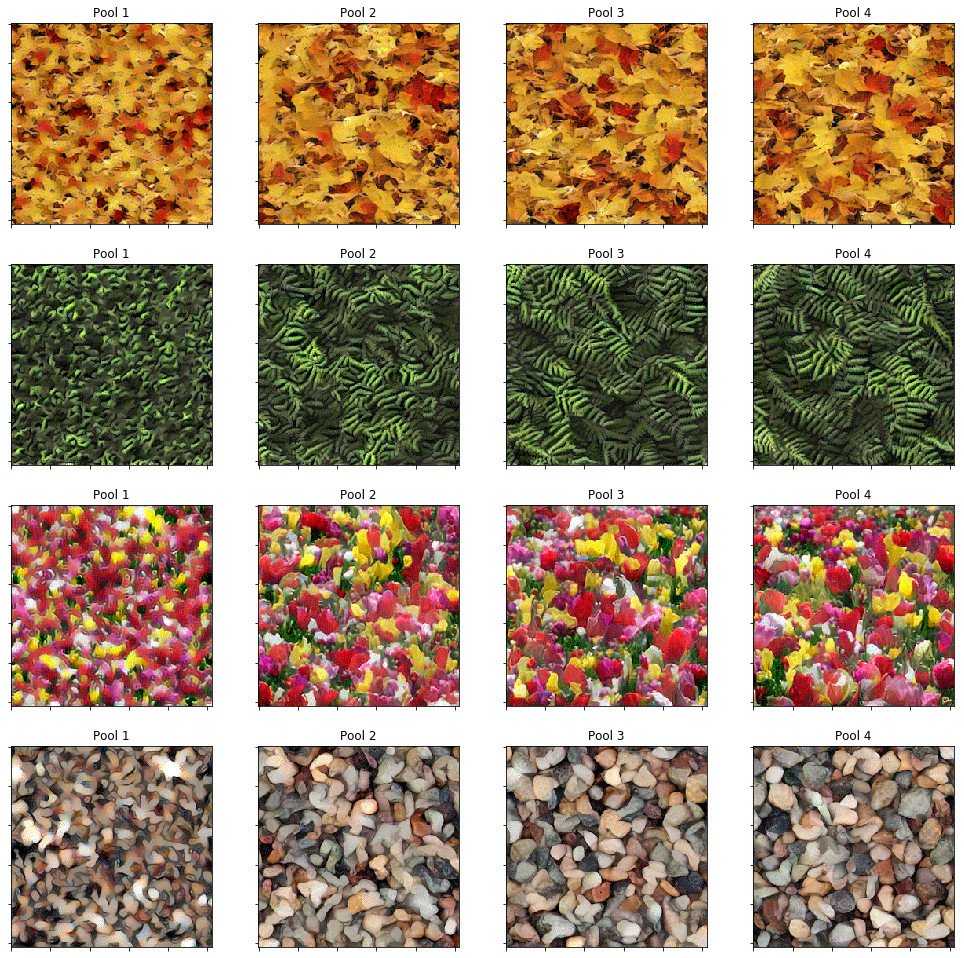

In [22]:
ims = ['leaves', 'fronds', 'tulips', 'rocks']
nIm = len(ims)

fig = plt.figure(figsize=(17, 17))

for i in range(4):
    name = ims[i]

    imName1 = 'output/pool1_' + name + '_step_5000.npy'
    imName2 = 'output/pool2_' + name + '_step_5000.npy'
    imName3 = 'output/pool3_' + name + '_step_5000.npy'
    imName4 = 'output/pool4_' + name + '_step_5000.npy'

    # Original
    # ax0 = fig.add_subplot(1,5,1)
    # im0 = postprocess_im(np.load('orig_ims/'+ name + '.npy'))
    # ax0.imshow(im0)
    # ax0.set_title('Original')

    # Pool 1
    ax1 = fig.add_subplot(nIm,4,i*nIm + 1)
    if os.path.isfile(imName1):
        ax1.imshow(np.load(imName1))
        ax1.set_title('Pool 1');
        ax1.xaxis.set_ticklabels([])
        ax1.yaxis.set_ticklabels([])


    # Pool 2
    ax2 = fig.add_subplot(nIm,4,i*nIm + 2)
    if os.path.isfile(imName2):
        ax2.imshow(np.load(imName2))
        ax2.set_title('Pool 2')
        ax2.xaxis.set_ticklabels([])
        ax2.yaxis.set_ticklabels([])


    # Pool 3
    ax3 = fig.add_subplot(nIm,4,i*nIm + 3)
    if os.path.isfile(imName3):
        ax3.imshow(np.load(imName3))
        ax3.set_title('Pool 3')
        ax3.xaxis.set_ticklabels([])
        ax3.yaxis.set_ticklabels([])


    # Pool 4
    ax4 = fig.add_subplot(nIm,4,i*nIm + 4)
    if os.path.isfile(imName4):
        ax4.imshow(np.load(imName4))
        ax4.set_title('Pool 4');
        ax4.xaxis.set_ticklabels([])
        ax4.yaxis.set_ticklabels([])
plt.savefig('textureStim_byLayer.png')

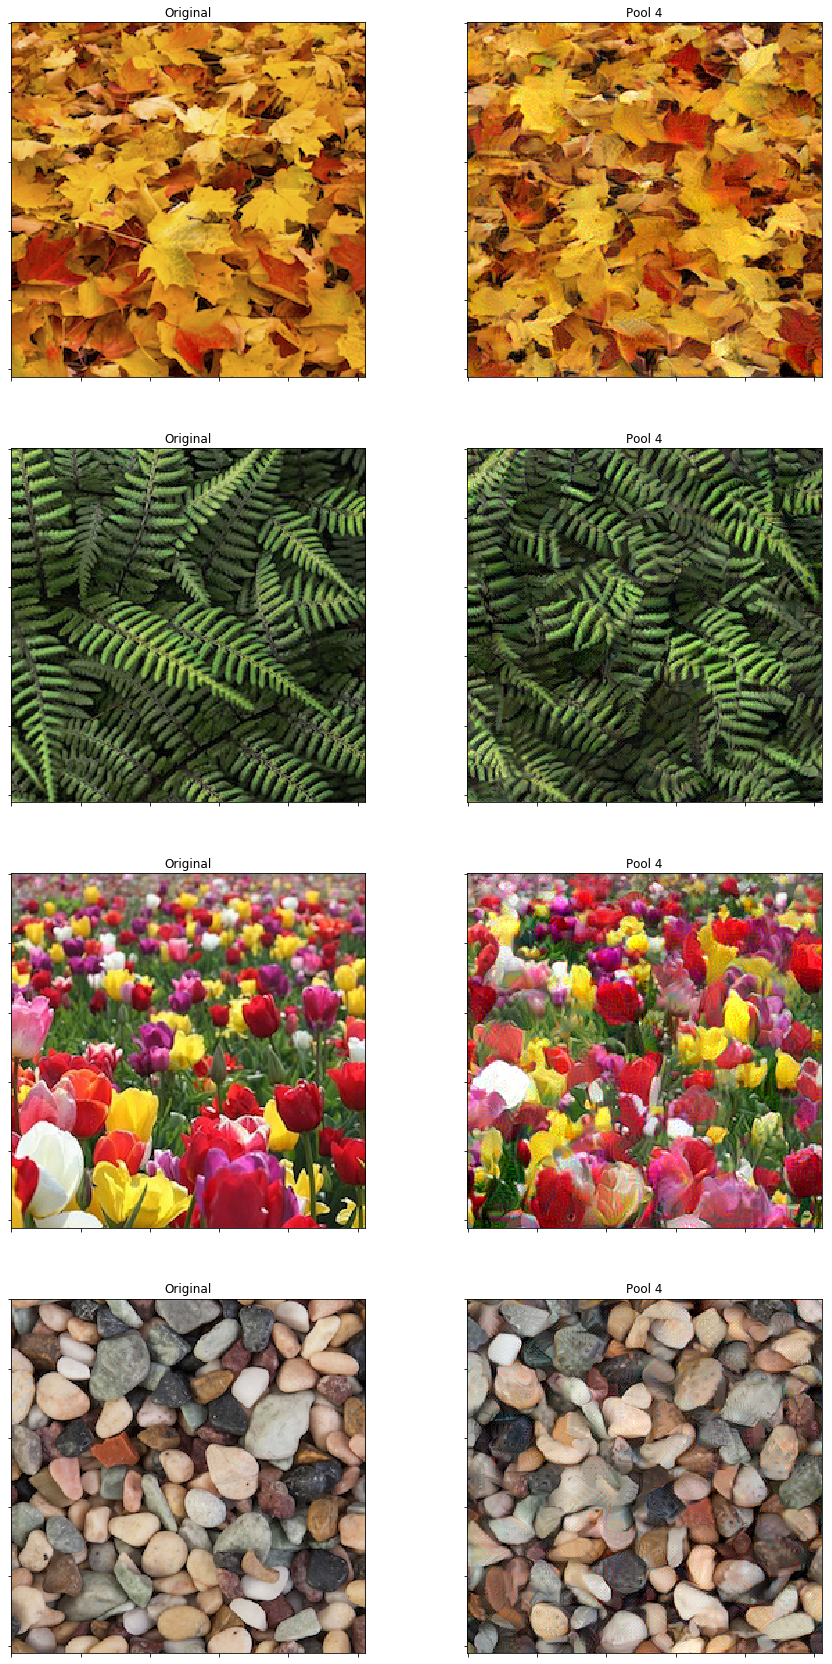

In [23]:
# Visualize and compare original image to synthesized version.
ims = ['leaves', 'fronds', 'tulips', 'rocks']
nIm = len(ims)

fig = plt.figure(figsize=(15,30))

for i in range(nIm):
    name = ims[i]
    imName = 'output/pool4_' + name + '_step_10000.npy'

    # Original
    ax1 = fig.add_subplot(nIm, 2, i*2 + 1)
    im1 = postprocess_im(np.load('orig_ims/'+ name + '.npy'))
    ax1.imshow(im1)
    ax1.set_title('Original')
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])

    # Pool 4
    ax2 = fig.add_subplot(nIm, 2, i*2 + 2)
    ax2.imshow(np.load(imName))
    ax2.set_title('Pool 4')
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
plt.savefig('orig_synth_comparison.png')